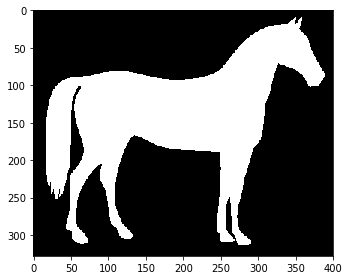

In [1]:
import skimage
from skimage import data
from skimage import io
import numpy as np

image = data.horse()
image = np.invert(image)
io.imshow(image)
io.show()

In [2]:
from skimage.morphology import binary_erosion
from skimage.morphology import binary_dilation

# Helper methods.

def CrossOperation(X, A, B):
    er1 = binary_erosion(X, A)
    er2 = binary_erosion(np.logical_not(X), B)
    return np.logical_and(er1, er2)

def MakeBolder(X, T1, T2):
    return np.logical_or(X, CrossOperation(X, T1, T2))

def MakeThinner(X, T1, T2):
    return np.logical_and(X, np.logical_not(CrossOperation(X, T1, T2)))

number of iterations to build convex hull:  436


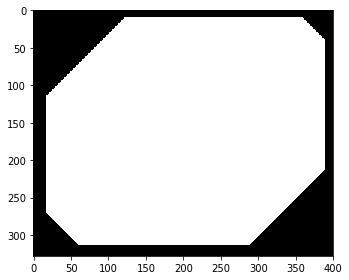

In [3]:
# Building convex hull.

im = image.copy()
iterations = 0

while True:
    snapshot = im.copy()
    iterations += 1
    TA = np.array([[True, True, True],
                   [False, False, True],
                   [False, False, False]])
    TB = np.array([[False, False, False],
                   [False, True, False],
                   [False, False, False]])
    for i in range(0, 4):
        im = MakeBolder(im, TA, TB)
        TA = np.rot90(TA)
    TA = np.array([[True, True, True],
                   [True, False, False],
                   [False, False, False]])
    for i in range(0, 4):
        im = MakeBolder(im, TA, TB)
        TA = np.rot90(TA)
    if (snapshot == im).all():
        break
        
print("number of iterations to build convex hull: ", iterations)

io.imshow(im)
io.show()

number of iterations to build a skeleton:  58


/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


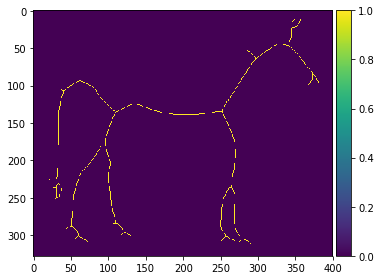

In [4]:
# Building a skeleton.

im = image.copy()
iterations = 0

while True:
    snapshot = im.copy()
    iterations += 1
    TA = np.array([[True, True, True],
                   [False, True, False],
                   [False, False, False]])
    TB = np.array([[False, False, False],
                   [False, False, False],
                   [True, True, True]])
    for i in range(0, 4):
        im = MakeThinner(im, TA, TB)
        TA = np.rot90(TA)
        TB = np.rot90(TB)
    TA = np.array([[False, True, False],
                   [False, True, True],
                   [False, False, False]])
    TB = np.array([[False, False, False],
                   [True, False, False],
                   [True, True, False]])
    for i in range(0, 4):
        im = MakeThinner(im, TA, TB)
        TA = np.rot90(TA)
        TB = np.rot90(TB)
    if (snapshot == im).all():
        break
        
print("number of iterations to build a skeleton: ", iterations)

io.imshow(im)
io.show()